In [51]:
!pwd

/Users/shihosato/src/github.com/twinkle13531/master_degree/202012/Summary


In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import sys, os
sys.path.append(os.path.join('..', 'Random'))
sys.path.append(os.path.join('..', 'SA'))
sys.path.append(os.path.join('..', 'QA'))
sys.path.append(os.path.join('..', '4ti2', 'functions'))

In [54]:
import aws_QA_DwaveSampler_AutoEmbedding as aqa ##new
import random_exact_test_functions as ret
import SA_exact_test_functions as net
import zsolve_t1 as zt
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import statistics
import math

In [55]:
time_dic = {}

In [56]:
y_dic = {'total_y_num':{}, 'mean_occurrence':{}, 'valid_y_num':{}}

In [57]:
per_time_dic = {}

In [58]:
mean_broken_chain_proportion = {}#only QA

In [59]:
p_dic = {}

In [60]:
chain_strength_dic = {20:15, 25:15, 30:15, 35:20, 40:20}
#chain_strength_dic = {20:10, 25:15, 30:20, 35:20, 40:30}

In [61]:
bit_list = [20, 25, 30, 35, 40]
num_list = [0, 1, 2, 3, 4]

## QA
### auto_scale=Trueを入れる

前回からの変更点
- calculation_time測定箇所がおかしかった→修正
- n, num_reads.たしかにnを増やすとvalid_y_numが増えるが、per_timeもcalculation_timeも*n弱ほど増える
  - どう頑張ってもvalid_y_numでSAには勝てない
  - n, num_reads = 100, 100となるとどうしても計算が時間かかりすぎる25bitでさえも
  - →n=1, num_reads=10000のtotal_timeで勝負する
  - 時間の平均、標準偏差などはtotal_timeにする（すべての手法）


In [62]:
############################################################ 本番 ##########################################################################
#n=1でのみ通用するコード
n, num_reads = 1, 10000
chain_strength_dic = {20:15, 25:15, 30:15, 35:20, 40:20}
time_dic['QA'] = {}
y_dic['total_y_num']['QA'] = {}
y_dic['mean_occurrence']['QA'] = {}
y_dic['valid_y_num']['QA'] = {}
per_time_dic['QA'] = {}
p_dic['QA'] = {}

for bit in bit_list:
    time_dic['QA'][bit] = {}
    y_dic['total_y_num']['QA'][bit] = {}
    y_dic['mean_occurrence']['QA'][bit] = {}
    y_dic['valid_y_num']['QA'][bit] = {}
    per_time_dic['QA'][bit] = {}
    mean_broken_chain_proportion[bit] = {}
    p_dic['QA'][bit] = {}
    chain_strength = chain_strength_dic[bit]
    
    for num in num_list:
        path = '../input/ost{}_{}.csv'.format(bit, num)
        df = pd.read_csv(path, sep=',')
        bqm = aqa.make_Hamiltonian(df)
        res = aqa.aws_autoscale_response(bqm, chain_strength, num_reads)################
        ads = aqa.aws_DSampler(df, bqm, num_reads, chain_strength, res)
        valid_y_info_dic = ads.find_valid_y()
        
        if len(valid_y_info_dic) > 0:
            calculation_time = res.info['additionalMetadata']['dwaveMetadata']['timing']['qpuAccessTime']*10**(-6)
            occurrence_list = [valid_y_info[0] for valid_y_info in list(valid_y_info_dic.values())]
            broken_list = [valid_y_info[1] for valid_y_info in list(valid_y_info_dic.values())]

            time_dic['QA'][bit][num] = calculation_time
            y_dic['total_y_num']['QA'][bit][num] = sum(occurrence_list)
            y_dic['mean_occurrence']['QA'][bit][num] = statistics.mean(occurrence_list)
            y_dic['valid_y_num']['QA'][bit][num] = len(valid_y_info_dic)
            #per_time_dic['QA'][bit][num] = calculation_time / sum(occurrence_list)
            per_time_dic['QA'][bit][num] = calculation_time / len(valid_y_info_dic)
            mean_broken_chain_proportion[bit][num] = statistics.mean(broken_list)
            p_dic['QA'][bit][num] = ads.p_value(valid_y_info_dic)

    print('{} finish'.format(bit))

20 finish


INFO:backoff:Backing off get_quantum_task(...) for 0.7s (botocore.errorfactory.ResourceNotFoundException: An error occurred (ResourceNotFoundException) when calling the GetQuantumTask operation: Quantum task cacd42e8-a9fe-4b40-bf9f-c1292db0809b not found)


25 finish
30 finish
35 finish
40 finish


In [63]:
time_dic['QA']

{20: {0: 2.400312,
  1: 2.400347,
  2: 2.4003289999999997,
  3: 2.400261,
  4: 2.400292},
 25: {0: 2.400362,
  1: 2.400344,
  2: 2.4003319999999997,
  3: 2.40036,
  4: 2.4003639999999997},
 30: {0: 2.4004469999999998,
  1: 2.400404,
  2: 2.4003959999999998,
  3: 2.400368,
  4: 2.400463},
 35: {0: 2.4004179999999997,
  1: 2.400409,
  2: 2.400384,
  3: 2.400442,
  4: 2.400476},
 40: {0: 2.400477, 1: 2.40046, 2: 2.400439, 3: 2.4004499999999998, 4: 2.40054}}

In [64]:
y_dic['total_y_num']['QA']

{20: {0: 414, 1: 90, 2: 445, 3: 182, 4: 57},
 25: {0: 90, 1: 192, 2: 65, 3: 2, 4: 117},
 30: {0: 11, 1: 28, 2: 82, 3: 8, 4: 283},
 35: {0: 7, 1: 7, 2: 19, 3: 24, 4: 72},
 40: {0: 2, 1: 11, 2: 9, 3: 4, 4: 13}}

In [65]:
y_dic['mean_occurrence']['QA']

{20: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
 25: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
 30: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
 35: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
 40: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1}}

In [66]:
y_dic['valid_y_num']['QA']

{20: {0: 404, 1: 85, 2: 326, 3: 159, 4: 48},
 25: {0: 84, 1: 191, 2: 63, 3: 2, 4: 115},
 30: {0: 11, 1: 28, 2: 82, 3: 8, 4: 281},
 35: {0: 7, 1: 7, 2: 19, 3: 24, 4: 72},
 40: {0: 2, 1: 11, 2: 9, 3: 4, 4: 13}}

In [67]:
per_time_dic['QA']

{20: {0: 0.005941366336633664,
  1: 0.028239376470588235,
  2: 0.0073629723926380355,
  3: 0.015095981132075472,
  4: 0.05000608333333333},
 25: {0: 0.028575738095238095,
  1: 0.012567246073298429,
  2: 0.03810050793650793,
  3: 1.20018,
  4: 0.020872730434782605},
 30: {0: 0.21822245454545453,
  1: 0.08572871428571428,
  2: 0.02927312195121951,
  3: 0.300046,
  4: 0.008542572953736654},
 35: {0: 0.3429168571428571,
  1: 0.3429155714285714,
  2: 0.126336,
  3: 0.10001841666666667,
  4: 0.03333994444444444},
 40: {0: 1.2002385,
  1: 0.21822363636363634,
  2: 0.26671544444444445,
  3: 0.6001124999999999,
  4: 0.18465692307692308}}

In [68]:
p_dic['QA']

{20: {0: 0.2871287128712871,
  1: 0.27058823529411763,
  2: 0.4233128834355828,
  3: 0.14465408805031446,
  4: 0.4375},
 25: {0: 0.09523809523809523,
  1: 0.06282722513089005,
  2: 0.14285714285714285,
  3: 0.0,
  4: 0.2956521739130435},
 30: {0: 0.09090909090909091,
  1: 0.21428571428571427,
  2: 0.1951219512195122,
  3: 0.0,
  4: 0.021352313167259787},
 35: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.041666666666666664, 4: 0.09722222222222222},
 40: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.07692307692307693}}

In [69]:
mean_broken_chain_proportion

{20: {0: 0.0,
  1: 0.0005882352941176471,
  2: 0.001226993865030675,
  3: 0.0003144654088050315,
  4: 0.0},
 25: {0: 0.002380952380952381,
  1: 0.0010471204188481676,
  2: 0.0031746031746031746,
  3: 0.0,
  4: 0.001391304347826087},
 30: {0: 0.0030303030303030303,
  1: 0.008333333333333333,
  2: 0.0028455284552845526,
  3: 0.008333333333333333,
  4: 0.007591933570581257},
 35: {0: 0.004081632653061224,
  1: 0.016326530612244896,
  2: 0.019548872180451128,
  3: 0.0023809523809523807,
  4: 0.005158730158730159},
 40: {0: 0.0125,
  1: 0.006818181818181819,
  2: 0.016666666666666666,
  3: 0.0,
  4: 0.007692307692307693}}

## Random

前回からの変更点
- calculation_timeをret.find_valid_y(df, num_reads)の時間とした
```python
time_0 = time.time()
valid_y_dic = ret.find_valid_y(df, num_reads)
time_1 = time.time()
calculation_time = time_1 - time_0
```

In [70]:
num_reads = 10000

time_dic['random'] = {}
y_dic['total_y_num']['random'] = {}
y_dic['mean_occurrence']['random'] = {}
y_dic['valid_y_num']['random'] = {}
per_time_dic['random'] = {}
p_dic['random'] = {}

for bit in bit_list:
    time_dic['random'][bit] = {}
    y_dic['total_y_num']['random'][bit] = {}
    y_dic['mean_occurrence']['random'][bit] = {}
    y_dic['valid_y_num']['random'][bit] = {}
    per_time_dic['random'][bit] = {}
    p_dic['random'][bit] = {}
    
    for num in num_list:
        df_path = '../input/ost{}_{}.csv'.format(bit, num)
        df = pd.read_csv(df_path, sep=',')
        t_list = ret.calc_marginals(df)
        
        time_0 = time.time()
        valid_y_dic = ret.find_valid_y(df, num_reads)
        time_1 = time.time()
        calculation_time = time_1 - time_0
        
        if len(valid_y_dic) > 0:
            rm = ret.Random_method(df, valid_y_dic, num_reads, t_list)
            
            mean_occurrence_list = [i for i in list(valid_y_dic.values())]
            
            time_dic['random'][bit][num] = calculation_time
            y_dic['total_y_num']['random'][bit][num] = sum(mean_occurrence_list)
            y_dic['mean_occurrence']['random'][bit][num] = statistics.mean(mean_occurrence_list)
            y_dic['valid_y_num']['random'][bit][num] = len(valid_y_dic)
            per_time_dic['random'][bit][num] = calculation_time / len(valid_y_dic)
            p_dic['random'][bit][num] = rm.p_value()
        print('{}_{} finish'.format(bit, num))

20_0 finish
20_1 finish
20_2 finish
20_3 finish
20_4 finish
25_0 finish
25_1 finish
25_2 finish
25_3 finish
25_4 finish
30_0 finish
30_1 finish
30_2 finish
30_3 finish
30_4 finish
35_0 finish
35_1 finish
35_2 finish
35_3 finish
35_4 finish
40_0 finish
40_1 finish
40_2 finish
40_3 finish
40_4 finish


In [71]:
time_dic['random']

{20: {0: 0.23176980018615723,
  1: 0.16418695449829102,
  2: 0.05255317687988281,
  3: 0.17732501029968262,
  4: 0.17819428443908691},
 25: {0: 0.07816529273986816, 1: 0.10420393943786621, 4: 0.0776069164276123},
 30: {0: 0.06556892395019531,
  2: 0.15509390830993652,
  3: 0.0790410041809082,
  4: 0.07080483436584473},
 35: {1: 0.10197091102600098,
  2: 0.16187191009521484,
  3: 0.09765028953552246,
  4: 0.08307361602783203},
 40: {2: 0.09287905693054199}}

In [72]:
y_dic['total_y_num']['random']

{20: {0: 160, 1: 17, 2: 14, 3: 23, 4: 1},
 25: {0: 3, 1: 23, 4: 6},
 30: {0: 1, 2: 2, 3: 1, 4: 7},
 35: {1: 2, 2: 5, 3: 1, 4: 3},
 40: {2: 1}}

In [73]:
y_dic['mean_occurrence']['random']

{20: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
 25: {0: 1, 1: 1, 4: 1},
 30: {0: 1, 2: 1, 3: 1, 4: 1},
 35: {1: 1, 2: 1, 3: 1, 4: 1},
 40: {2: 1}}

In [74]:
y_dic['valid_y_num']['random']

{20: {0: 160, 1: 17, 2: 14, 3: 23, 4: 1},
 25: {0: 3, 1: 23, 4: 6},
 30: {0: 1, 2: 2, 3: 1, 4: 7},
 35: {1: 2, 2: 5, 3: 1, 4: 3},
 40: {2: 1}}

In [75]:
per_time_dic['random']

{20: {0: 0.0014485612511634827,
  1: 0.009658056146958294,
  2: 0.0037537983485630582,
  3: 0.00770978305650794,
  4: 0.17819428443908691},
 25: {0: 0.026055097579956055,
  1: 0.0045306060625159225,
  4: 0.012934486071268717},
 30: {0: 0.06556892395019531,
  2: 0.07754695415496826,
  3: 0.0790410041809082,
  4: 0.010114976337977819},
 35: {1: 0.05098545551300049,
  2: 0.03237438201904297,
  3: 0.09765028953552246,
  4: 0.027691205342610676},
 40: {2: 0.09287905693054199}}

In [76]:
p_dic['random']

{20: {0: 0.28125,
  1: 0.5294117647058824,
  2: 0.42857142857142855,
  3: 0.34782608695652173,
  4: 0.0},
 25: {0: 0.0, 1: 0.17391304347826086, 4: 0.6666666666666666},
 30: {0: 0.0, 2: 0.5, 3: 0.0, 4: 0.2857142857142857},
 35: {1: 0.0, 2: 0.0, 3: 1.0, 4: 0.0},
 40: {2: 0.0}}

## SA
- occurrence_list = list(valid_y_info_dic.values())箇所を変更

In [77]:
num_reads = 10000
time_dic['SA'] = {}
y_dic['total_y_num']['SA'] = {}
y_dic['mean_occurrence']['SA'] = {}
y_dic['valid_y_num']['SA'] = {}
per_time_dic['SA'] = {}
p_dic['SA'] = {}

for bit in bit_list:
    time_dic['SA'][bit] = {}
    y_dic['total_y_num']['SA'][bit] = {}
    y_dic['mean_occurrence']['SA'][bit] = {}
    y_dic['valid_y_num']['SA'][bit] = {}
    per_time_dic['SA'][bit] = {}
    p_dic['SA'][bit] = {}
    
    for num in num_list:
        
        path = '../input/ost{}_{}.csv'.format(bit, num)
        df = pd.read_csv(path, sep=',')
        
        res, elapsed_time = net.make_res_data(df, num_reads)
        valid_y_info_dic = net.find_valid_y(res)

        occurrence_list = list(valid_y_info_dic.values())
        
        if len(valid_y_info_dic) > 0:
            rvd = net.SA_res_valid_dic(df, res, valid_y_info_dic, num_reads)
            
            time_dic['SA'][bit][num] = elapsed_time
            y_dic['total_y_num']['SA'][bit][num] = sum(occurrence_list)
            y_dic['mean_occurrence']['SA'][bit][num] = statistics.mean(occurrence_list)
            y_dic['valid_y_num']['SA'][bit][num] = len(valid_y_info_dic)
            per_time_dic['SA'][bit][num] = elapsed_time / len(valid_y_info_dic)
            p_dic['SA'][bit][num] = rvd.calc_p_value()
            
        print('{}_{} finish'.format(bit, num))

20_0 finish
20_1 finish
20_2 finish
20_3 finish
20_4 finish
25_0 finish
25_1 finish
25_2 finish
25_3 finish
25_4 finish
30_0 finish
30_1 finish
30_2 finish
30_3 finish
30_4 finish
35_0 finish
35_1 finish
35_2 finish
35_3 finish
35_4 finish
40_0 finish
40_1 finish
40_2 finish
40_3 finish
40_4 finish


In [78]:
time_dic['SA']

{20: {0: 4.430273056030273,
  1: 4.240472793579102,
  2: 4.124181032180786,
  3: 4.212869882583618,
  4: 4.245862722396851},
 25: {0: 5.772629976272583,
  1: 6.019297122955322,
  2: 5.855103969573975,
  3: 5.907823085784912,
  4: 5.65931510925293},
 30: {0: 7.791236162185669,
  1: 7.444330930709839,
  2: 7.486382722854614,
  3: 7.428648948669434,
  4: 7.747031927108765},
 35: {0: 9.794157266616821,
  1: 9.636767148971558,
  2: 9.712950944900513,
  3: 9.954700231552124,
  4: 9.613384008407593},
 40: {0: 11.873701810836792,
  1: 12.363799810409546,
  2: 11.900765180587769,
  3: 11.866310119628906,
  4: 11.646608114242554}}

In [79]:
y_dic['total_y_num']['SA']

{20: {0: 9747, 1: 9834, 2: 9844, 3: 9606, 4: 9613},
 25: {0: 9856, 1: 9822, 2: 9418, 3: 8585, 4: 9870},
 30: {0: 9773, 1: 9245, 2: 9929, 3: 9207, 4: 9899},
 35: {0: 9618, 1: 9799, 2: 9833, 3: 9556, 4: 9427},
 40: {0: 9677, 1: 9762, 2: 9690, 3: 9582, 4: 9574}}

In [80]:
y_dic['mean_occurrence']['SA']

{20: {0: 1, 1: 7, 2: 6, 3: 4, 4: 36},
 25: {0: 1, 1: 1, 2: 1, 3: 6, 4: 1},
 30: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
 35: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
 40: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1}}

In [81]:
y_dic['valid_y_num']['SA']

{20: {0: 7387, 1: 1365, 2: 1634, 3: 2354, 4: 260},
 25: {0: 6820, 1: 9328, 2: 6982, 3: 1372, 4: 7886},
 30: {0: 8985, 1: 8566, 2: 9813, 3: 8864, 4: 9826},
 35: {0: 9577, 1: 9792, 2: 9830, 3: 9540, 4: 9419},
 40: {0: 9674, 1: 9758, 2: 9689, 3: 9581, 4: 9571}}

In [82]:
per_time_dic['SA']

{20: {0: 0.0005997391439055467,
  1: 0.003106573475149525,
  2: 0.0025239785998658424,
  3: 0.0017896643511400247,
  4: 0.016330241239987886},
 25: {0: 0.0008464266827379154,
  1: 0.0006452934308485551,
  2: 0.000838599823771695,
  3: 0.004305993502758682,
  4: 0.0007176407696237547},
 30: {0: 0.0008671381371380823,
  1: 0.0008690556771783608,
  2: 0.0007629045880826062,
  3: 0.0008380696016098188,
  4: 0.000788421730827271},
 35: {0: 0.0010226748738244567,
  1: 0.000984146971912945,
  2: 0.000988092669877977,
  3: 0.00104346962594886,
  4: 0.001020637435864486},
 40: {0: 0.001227382862397849,
  1: 0.0012670424072975554,
  2: 0.0012282758985021952,
  3: 0.0012385252186232027,
  4: 0.0012168642894412865}}

In [83]:
p_dic['SA']

{20: {0: 0.231217002842832,
  1: 0.2153846153846154,
  2: 0.33353733170134636,
  3: 0.26380628717077315,
  4: 0.4153846153846154},
 25: {0: 0.08299120234604106,
  1: 0.06389365351629503,
  2: 0.14752219994270982,
  3: 0.15743440233236153,
  4: 0.26033477047933046},
 30: {0: 0.0426265998887034,
  1: 0.2972215736633201,
  2: 0.19841027208804646,
  3: 0.10976985559566788,
  4: 0.06360675758192551},
 35: {0: 0.06379868434791688,
  1: 0.04993872549019608,
  2: 0.014140386571719227,
  3: 0.07861635220125786,
  4: 0.1457691899352373},
 40: {0: 0.03876369650609882,
  1: 0.0626152900184464,
  2: 0.03374961296315409,
  3: 0.06199770378874857,
  4: 0.028210218367986626}}

## exhaustive enumeration

In [84]:
enu_time_dic = {}
enu_time_dic[20] = [4.84, 0.02, 0.23, 0.38, 0.65]
enu_time_dic[25] = [5.47, 2894.31, 4.19, 0.23, 15.37]
enu_time_dic[30] = [120017.00, 105.15, 12792.04, 725.79, 140234.05]

In [85]:
time_dic['enumeration'] = {}
y_dic['valid_y_num']['enumeration'] = {}
per_time_dic['enumeration'] = {}
p_dic['enumeration'] = {}

In [86]:
for bit in [20, 25, 30]:
    time_dic['enumeration'][bit] = {}
    y_dic['valid_y_num']['enumeration'][bit] = {}
    per_time_dic['enumeration'][bit] = {}
    p_dic['enumeration'][bit] = {}
    
    for num in [0, 1, 2, 3, 4]:
        
        path = '../input/ost{}_{}.csv'.format(bit, num)
        df = pd.read_csv(path, sep=',')
        
        zinhom_path = '../4ti2/{}bit/{}/{}bit_{}.zinhom'.format(bit, num, bit, num)
        zinhom_num, zinhom_list = zt.make_result_list(zinhom_path)
        
        if zinhom_num > 0:
            zrs = zt.zsolve_result_summerize(df, zinhom_list)
            
            time_dic['enumeration'][bit][num] = enu_time_dic[bit][num]
            y_dic['valid_y_num']['enumeration'][bit][num] = zinhom_num
            per_time_dic['enumeration'][bit][num] = enu_time_dic[bit][num] / zinhom_num
            p_dic['enumeration'][bit][num] = zrs.calucurate_p()

        print('{}_{} finish'.format(bit, num))

20_0 finish
20_1 finish
20_2 finish
20_3 finish
20_4 finish
25_0 finish
25_1 finish
25_2 finish
25_3 finish
25_4 finish
30_0 finish
30_1 finish
30_2 finish
30_3 finish
30_4 finish


In [93]:
diff_time = {}
diff_time['QA'] = {}
for bit in [20, 25, 30]:
    diff_time['QA'][bit] = {}
    for num in num_list:
        diff_time['QA'][bit][num] = time_dic['enumeration'][bit][num] - time_dic['QA'][bit][num]

In [94]:
diff_time['QA']

{20: {0: 2.439688,
  1: -2.380347,
  2: -2.1703289999999997,
  3: -2.020261,
  4: -1.750292},
 25: {0: 3.069638,
  1: 2891.909656,
  2: 1.7896680000000007,
  3: -2.17036,
  4: 12.969636},
 30: {0: 120014.599553,
  1: 102.74959600000001,
  2: 12789.639604000002,
  3: 723.389632,
  4: 140231.649537}}

In [95]:
diff_time['SA'] = {}
for bit in [20, 25, 30]:
    diff_time['SA'][bit] = {}
    for num in num_list:
        diff_time['SA'][bit][num] = time_dic['enumeration'][bit][num] - time_dic['SA'][bit][num]

In [103]:
diff_time

{'QA': {20: {0: 2.439688,
   1: -2.380347,
   2: -2.1703289999999997,
   3: -2.020261,
   4: -1.750292},
  25: {0: 3.069638,
   1: 2891.909656,
   2: 1.7896680000000007,
   3: -2.17036,
   4: 12.969636},
  30: {0: 120014.599553,
   1: 102.74959600000001,
   2: 12789.639604000002,
   3: 723.389632,
   4: 140231.649537}},
 'SA': {20: {0: 0.4097269439697264,
   1: -4.220472793579102,
   2: -3.894181032180786,
   3: -3.8328698825836183,
   4: -3.5958627223968507},
  25: {0: -0.30262997627258326,
   1: 2888.2907028770446,
   2: -1.6651039695739742,
   3: -5.677823085784912,
   4: 9.71068489074707},
  30: {0: 120009.20876383781,
   1: 97.70566906929017,
   2: 12784.553617277146,
   3: 718.3613510513305,
   4: 140226.30296807288}}}

In [98]:
p_dic['QA']

{20: {0: 0.2871287128712871,
  1: 0.27058823529411763,
  2: 0.4233128834355828,
  3: 0.14465408805031446,
  4: 0.4375},
 25: {0: 0.09523809523809523,
  1: 0.06282722513089005,
  2: 0.14285714285714285,
  3: 0.0,
  4: 0.2956521739130435},
 30: {0: 0.09090909090909091,
  1: 0.21428571428571427,
  2: 0.1951219512195122,
  3: 0.0,
  4: 0.021352313167259787},
 35: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.041666666666666664, 4: 0.09722222222222222},
 40: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.07692307692307693}}

In [99]:
p_dic['SA']

{20: {0: 0.231217002842832,
  1: 0.2153846153846154,
  2: 0.33353733170134636,
  3: 0.26380628717077315,
  4: 0.4153846153846154},
 25: {0: 0.08299120234604106,
  1: 0.06389365351629503,
  2: 0.14752219994270982,
  3: 0.15743440233236153,
  4: 0.26033477047933046},
 30: {0: 0.0426265998887034,
  1: 0.2972215736633201,
  2: 0.19841027208804646,
  3: 0.10976985559566788,
  4: 0.06360675758192551},
 35: {0: 0.06379868434791688,
  1: 0.04993872549019608,
  2: 0.014140386571719227,
  3: 0.07861635220125786,
  4: 0.1457691899352373},
 40: {0: 0.03876369650609882,
  1: 0.0626152900184464,
  2: 0.03374961296315409,
  3: 0.06199770378874857,
  4: 0.028210218367986626}}

In [100]:
p_dic['enumeration']

{20: {0: 0.22959183673469388,
  1: 0.2153846153846154,
  2: 0.3333333333333333,
  3: 0.2640801001251564,
  4: 0.4153846153846154},
 25: {0: 0.08333333333333333,
  1: 0.0608044901777362,
  2: 0.15306122448979592,
  3: 0.15743440233236153,
  4: 0.248},
 30: {0: 0.04459997255386304,
  1: 0.31648559282002836,
  2: 0.20353302611367127,
  3: 0.11007532956685499,
  4: 0.0675067506750675}}

In [105]:
diff_p = {}

diff_p['SA'] = {}
for bit in [20, 25, 30]:
    diff_p['SA'][bit] = {}
    for num in num_list:
        rr = (p_dic['enumeration'][bit][num] - p_dic['SA'][bit][num])**2
        diff_p['SA'][bit][num] = rr**0.5
        
        
diff_p['QA'] = {}
for bit in [20, 25, 30]:
    diff_p['QA'][bit] = {}
    for num in num_list:
        rr = (p_dic['enumeration'][bit][num] - p_dic['QA'][bit][num])**2
        diff_p['QA'][bit][num] = rr**0.5

In [106]:
diff_p

{'SA': {20: {0: 0.0016251661081381208,
   1: 0.0,
   2: 0.0002039983680130475,
   3: 0.000273812954383279,
   4: 0.0},
  25: {0: 0.00034213098729227176,
   1: 0.0030891633385588257,
   2: 0.005539024547086102,
   3: 0.0,
   4: 0.012334770479330459},
  30: {0: 0.0019733726651596437,
   1: 0.01926401915670828,
   2: 0.005122754025624815,
   3: 0.0003054739711871174,
   4: 0.0038999930931419985}},
 'QA': {20: {0: 0.057536876136593224,
   1: 0.05520361990950223,
   2: 0.0899795501022495,
   3: 0.11942601207484196,
   4: 0.022115384615384592},
  25: {0: 0.011904761904761904,
   1: 0.0020227349531538458,
   2: 0.010204081632653073,
   3: 0.15743440233236153,
   4: 0.047652173913043494},
  30: {0: 0.04630911835522787,
   1: 0.10219987853431409,
   2: 0.00841107489415907,
   3: 0.11007532956685499,
   4: 0.04615443750780772}}}

In [107]:
diff_p_mean = {}
diff_p_mean['SA'] = {}
for bit in [20, 25, 30]:
    ff= list(diff_p['SA'][bit].values())
    gg = statistics.mean(ff)
    diff_p_mean['SA'][bit] = gg
    
diff_p_mean['QA'] = {}
for bit in [20, 25, 30]:
    ff= list(diff_p['QA'][bit].values())
    gg = statistics.mean(ff)
    diff_p_mean['QA'][bit] = gg

In [108]:
diff_p_mean

{'SA': {20: 0.00042059548610688945,
  25: 0.004261017870453532,
  30: 0.006113122582364371},
 'QA': {20: 0.0688522885677143,
  25: 0.04584363094719477,
  30: 0.06262996777167275}}

In [87]:
time_dic['enumeration']

{20: {0: 4.84, 1: 0.02, 2: 0.23, 3: 0.38, 4: 0.65},
 25: {0: 5.47, 1: 2894.31, 2: 4.19, 3: 0.23, 4: 15.37},
 30: {0: 120017.0, 1: 105.15, 2: 12792.04, 3: 725.79, 4: 140234.05}}

In [88]:
time_dic['QA']

{20: {0: 2.400312,
  1: 2.400347,
  2: 2.4003289999999997,
  3: 2.400261,
  4: 2.400292},
 25: {0: 2.400362,
  1: 2.400344,
  2: 2.4003319999999997,
  3: 2.40036,
  4: 2.4003639999999997},
 30: {0: 2.4004469999999998,
  1: 2.400404,
  2: 2.4003959999999998,
  3: 2.400368,
  4: 2.400463},
 35: {0: 2.4004179999999997,
  1: 2.400409,
  2: 2.400384,
  3: 2.400442,
  4: 2.400476},
 40: {0: 2.400477, 1: 2.40046, 2: 2.400439, 3: 2.4004499999999998, 4: 2.40054}}

In [89]:
time_dic['SA']

{20: {0: 4.430273056030273,
  1: 4.240472793579102,
  2: 4.124181032180786,
  3: 4.212869882583618,
  4: 4.245862722396851},
 25: {0: 5.772629976272583,
  1: 6.019297122955322,
  2: 5.855103969573975,
  3: 5.907823085784912,
  4: 5.65931510925293},
 30: {0: 7.791236162185669,
  1: 7.444330930709839,
  2: 7.486382722854614,
  3: 7.428648948669434,
  4: 7.747031927108765},
 35: {0: 9.794157266616821,
  1: 9.636767148971558,
  2: 9.712950944900513,
  3: 9.954700231552124,
  4: 9.613384008407593},
 40: {0: 11.873701810836792,
  1: 12.363799810409546,
  2: 11.900765180587769,
  3: 11.866310119628906,
  4: 11.646608114242554}}

In [269]:
y_dic['valid_y_num']['enumeration']

{20: {0: 16464, 1: 1365, 2: 1638, 3: 2397, 4: 260},
 25: {0: 12600, 1: 89796, 2: 14700, 3: 1372, 4: 21000},
 30: {0: 58296, 1: 57159, 2: 429660, 3: 127440, 4: 839916}}

In [270]:
per_time_dic['enumeration']

{20: {0: 0.00029397473275024293,
  1: 1.4652014652014653e-05,
  2: 0.00014041514041514042,
  3: 0.00015853149770546517,
  4: 0.0025},
 25: {0: 0.0004341269841269841,
  1: 0.03223205933449151,
  2: 0.0002850340136054422,
  3: 0.00016763848396501459,
  4: 0.0007319047619047618},
 30: {0: 2.058751886921916,
  1: 0.0018396053114995016,
  2: 0.029772471256342227,
  3: 0.00569515065913371,
  4: 0.16696199381842944}}

In [271]:
p_dic['enumeration']

{20: {0: 0.22959183673469388,
  1: 0.2153846153846154,
  2: 0.3333333333333333,
  3: 0.2640801001251564,
  4: 0.4153846153846154},
 25: {0: 0.08333333333333333,
  1: 0.0608044901777362,
  2: 0.15306122448979592,
  3: 0.15743440233236153,
  4: 0.248},
 30: {0: 0.04459997255386304,
  1: 0.31648559282002836,
  2: 0.20353302611367127,
  3: 0.11007532956685499,
  4: 0.0675067506750675}}

## 2021/01/22

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
method_list_all = ['enumeration', 'random', 'SA', 'QA']
method_list_40 = ['random', 'SA', 'QA']
bit_list_30 = [20, 25, 30]
bit_list_35 = [20, 25, 30, 35]
bit_list_40 = [20, 25, 30, 35, 40]

In [8]:
mean_time_30 = {'enumeration': np.array([1.2240000e+00, 5.8391400e+02, 5.4774806e+04]),
 'random': np.array([0.16080585, 0.08665872, 0.09262717]),
 'SA': np.array([4.2507319 , 5.84283385, 7.57952614]),
 'QA': np.array([2.4003082, 2.4003524, 2.4004156])}

In [9]:
std_time_30 = {'enumeration': np.array([1.81961095e+00, 1.15520876e+03, 6.20200715e+04]),
 'random': np.array([0.05889176, 0.01240844, 0.03638351]),
 'SA': np.array([0.09981246, 0.1217548 , 0.15658652]),
 'QA': np.array([2.98087236e-05, 1.24193398e-05, 3.46906327e-05])}

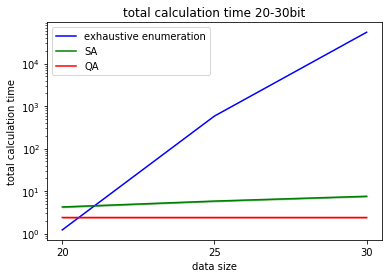

In [50]:
############################################## total calculation time30 ###################################################
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_time_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_time_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_time_30['QA'], label='QA', color='r')

ax.fill_between(bit_list_30, mean_time_30['SA'] + std_time_30['SA'], mean_time_30['SA'] - std_time_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_time_30['QA'] + std_time_30['QA'], mean_time_30['QA'] - std_time_30['QA'], alpha=0.4, color='r')

ax.legend(loc='upper left')
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_30)
ax.set_yscale('log')
plt.title('total calculation time 20-30bit')
plt.savefig('slide/time_total_30_std_log.png')
plt.show()

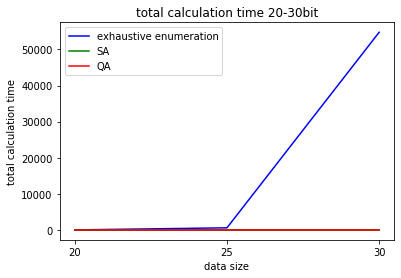

In [11]:
############################################## total calculation time30 ###################################################
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_time_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_time_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_time_30['QA'], label='QA', color='r')

ax.fill_between(bit_list_30, mean_time_30['SA'] + std_time_30['SA'], mean_time_30['SA'] - std_time_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_time_30['QA'] + std_time_30['QA'], mean_time_30['QA'] - std_time_30['QA'], alpha=0.4, color='r')

ax.legend(loc='upper left')
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_30)
plt.title('total calculation time 20-30bit')
plt.savefig('slide/time_total_30_std.png')
plt.show()

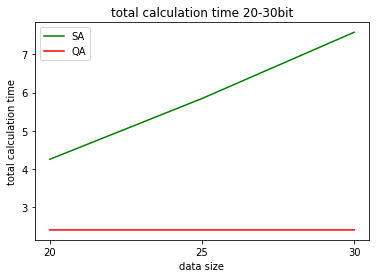

In [52]:
############################################## total calculation time30 ###################################################
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_time_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_time_30['QA'], label='QA', color='r')

ax.legend(loc='upper left')
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_30)
plt.title('total calculation time 20-30bit')
plt.savefig('slide/SAQA_time_total_30.png')
plt.show()

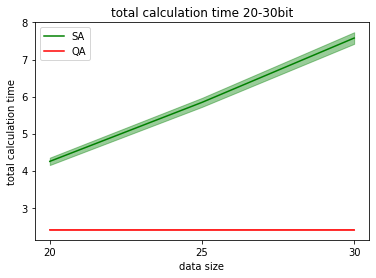

In [15]:
############################################## total calculation time30 ###################################################
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_time_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_time_30['QA'], label='QA', color='r')

ax.fill_between(bit_list_30, mean_time_30['SA'] + std_time_30['SA'], mean_time_30['SA'] - std_time_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_time_30['QA'] + std_time_30['QA'], mean_time_30['QA'] - std_time_30['QA'], alpha=0.4, color='r')

ax.legend(loc='upper left')
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_30)
plt.title('total calculation time 20-30bit')
plt.savefig('slide/SAQA_time_total_30_std.png')
plt.show()

In [17]:
mean_time_40 = {'random': np.array([0.16080585, 0.08665872, 0.09262717, 0.11114168, 0.09287906]),
 'SA': np.array([ 4.2507319 ,  5.84283385,  7.57952614,  9.74239192, 11.93023701]),
 'QA': np.array([2.4003082, 2.4003524, 2.4004156, 2.4004258, 2.4004732])}

In [18]:
std_time_40 = {'random': np.array([0.05889176, 0.01240844, 0.03638351, 0.03011434, 0.        ]),
 'SA': np.array([0.09981246, 0.1217548 , 0.15658652, 0.12362918, 0.23519078]),
 'QA': np.array([2.98087236e-05, 1.24193398e-05, 3.46906327e-05, 3.12179436e-05, 3.56617442e-05])}

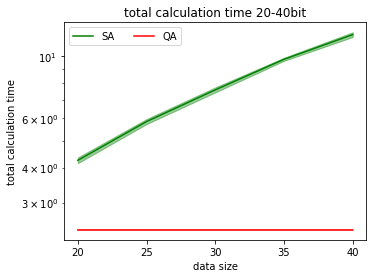

In [53]:
############################################## total calculation time40 ###################################################
fig, ax = plt.subplots(1)

ax.plot(bit_list_40, mean_time_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_time_40['QA'], label='QA', color='r')

ax.fill_between(bit_list_40, mean_time_40['SA'] + std_time_40['SA'], mean_time_40['SA'] - std_time_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_time_40['QA'] + std_time_40['QA'], mean_time_40['QA'] - std_time_40['QA'], alpha=0.4, color='r')

fig.subplots_adjust(left = 0.2)
ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_40)
ax.set_yscale('log')
plt.title('total calculation time 20-40bit')
plt.savefig('slide/time_total_40_std_log.png')
plt.show()

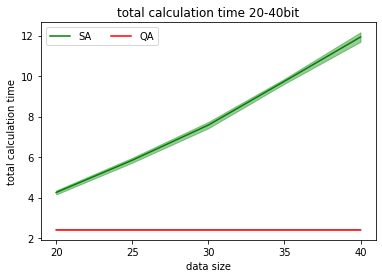

In [20]:
############################################## total calculation time40 ###################################################
fig, ax = plt.subplots(1)

ax.plot(bit_list_40, mean_time_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_time_40['QA'], label='QA', color='r')

ax.fill_between(bit_list_40, mean_time_40['SA'] + std_time_40['SA'], mean_time_40['SA'] - std_time_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_time_40['QA'] + std_time_40['QA'], mean_time_40['QA'] - std_time_40['QA'], alpha=0.4, color='r')

ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_40)
plt.title('total calculation time 20-40bit')
plt.savefig('slide/time_total_40_std.png')
plt.show()

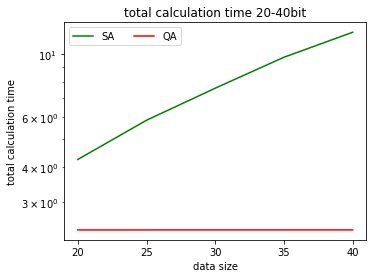

In [55]:
############################################## total calculation time40 ###################################################
fig, ax = plt.subplots(1)

ax.plot(bit_list_40, mean_time_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_time_40['QA'], label='QA', color='r')
fig.subplots_adjust(left = 0.2)
ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_40)
ax.set_yscale('log')
plt.title('total calculation time 20-40bit')
plt.savefig('slide/time_total_40_log.png')
plt.show()

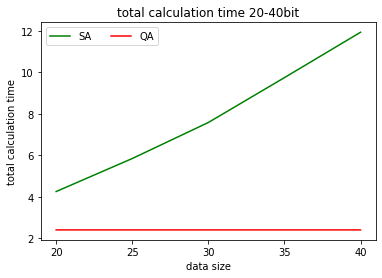

In [22]:
############################################## total calculation time40 ###################################################
fig, ax = plt.subplots(1)

ax.plot(bit_list_40, mean_time_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_time_40['QA'], label='QA', color='r')

ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_40)
plt.title('total calculation time 20-40bit')
plt.savefig('slide/time_total_40.png')
plt.show()

In [23]:
mean_valid_y_num_30 = {'enumeration': np.array([  4424.8,  27893.6, 302494.2]),
 'random': np.array([43.        , 10.66666667,  2.75      ]),
 'SA': np.array([2600. , 6477.6, 9210.8]),
 'QA': np.array([204.4,  91. ,  82. ])}

In [26]:
std_valid_y_num_30 = {'enumeration': np.array([  6058.52290249,  31593.63668589, 301814.3223854 ]),
 'random': np.array([58.94064811,  8.80656321,  2.48746859]),
 'SA': np.array([2486.35741598, 2703.59683385,  515.39088079]),
 'QA': np.array([138.13413771,  62.17716623, 102.98931983])}

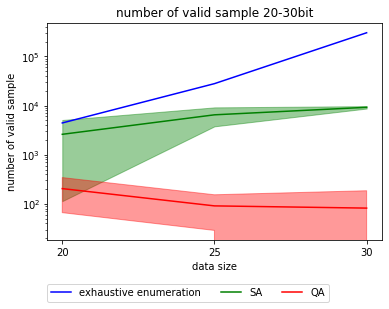

In [47]:
############################################## total valid y_num30 ###################################################
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_valid_y_num_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_valid_y_num_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_valid_y_num_30['QA'], label='QA', color='r')

#ax.fill_between(bit_list_30, mean_valid_y_num_30['enumeration'] + std_valid_y_num_30['enumeration'], mean_valid_y_num_30['enumeration'] - std_valid_y_num_30['enumeration'], alpha=0.4, color='b')
ax.fill_between(bit_list_30, mean_valid_y_num_30['SA'] + std_valid_y_num_30['SA'], mean_valid_y_num_30['SA'] - std_valid_y_num_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_valid_y_num_30['QA'] + std_valid_y_num_30['QA'], mean_valid_y_num_30['QA'] - std_valid_y_num_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
#ax.legend(loc='upper left', ncol=3)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
ax.set_xlabel('data size')
ax.set_ylabel('number of valid sample')

ax.set_xticks(bit_list_30)
ax.set_yscale('log')
plt.title('number of valid sample 20-30bit')
plt.savefig('slide/valid_y_num30_std_log.png')
plt.show()

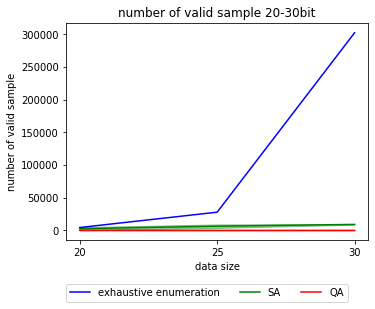

In [56]:
############################################## total valid y_num30 ###################################################
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_valid_y_num_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_valid_y_num_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_valid_y_num_30['QA'], label='QA', color='r')

#ax.fill_between(bit_list_30, mean_valid_y_num_30['enumeration'] + std_valid_y_num_30['enumeration'], mean_valid_y_num_30['enumeration'] - std_valid_y_num_30['enumeration'], alpha=0.4, color='b')
ax.fill_between(bit_list_30, mean_valid_y_num_30['SA'] + std_valid_y_num_30['SA'], mean_valid_y_num_30['SA'] - std_valid_y_num_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_valid_y_num_30['QA'] + std_valid_y_num_30['QA'], mean_valid_y_num_30['QA'] - std_valid_y_num_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
fig.subplots_adjust(left = 0.2)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
ax.set_xlabel('data size')
ax.set_ylabel('number of valid sample')

ax.set_xticks(bit_list_30)
plt.title('number of valid sample 20-30bit')
plt.savefig('slide/valid_y_num30_std.png')
plt.show()

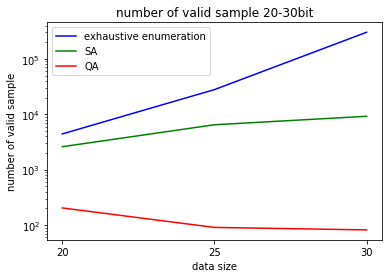

In [31]:
############################################## total valid y_num30 ###################################################
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_valid_y_num_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_valid_y_num_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_valid_y_num_30['QA'], label='QA', color='r')

ax.legend(loc='upper left', ncol=1)
#plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
ax.set_xlabel('data size')
ax.set_ylabel('number of valid sample')

ax.set_xticks(bit_list_30)
ax.set_yscale('log')
plt.title('number of valid sample 20-30bit')
plt.savefig('slide/valid_y_num30_log.png')
plt.show()

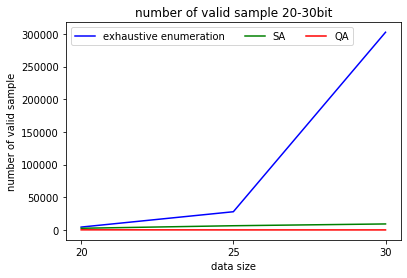

In [33]:
############################################## total valid y_num30 ###################################################
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_valid_y_num_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_valid_y_num_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_valid_y_num_30['QA'], label='QA', color='r')

ax.legend(loc='upper left', ncol=3)
ax.set_xlabel('data size')
ax.set_ylabel('number of valid sample')

ax.set_xticks(bit_list_30)
plt.title('number of valid sample 20-30bit')
plt.savefig('slide/valid_y_num30.png')
plt.show()

In [34]:
mean_p_30 = {'enumeration': np.array([0.2915549 , 0.14052669, 0.14844013]),
 'random': np.array([0.31741186, 0.28019324, 0.19642857]),
 'SA': np.array([0.29186597, 0.14243525, 0.14232701]),
 'QA': np.array([0.31263678, 0.11931493, 0.10433381])}

In [35]:
std_p_30 = {'enumeration': np.array([0.07412885, 0.06575744, 0.10007932]),
 'random': np.array([0.1790438 , 0.28235052, 0.21053261]),
 'SA': np.array([0.07390318, 0.06907029, 0.09416441]),
 'QA': np.array([0.10814523, 0.09965507, 0.08750269])}

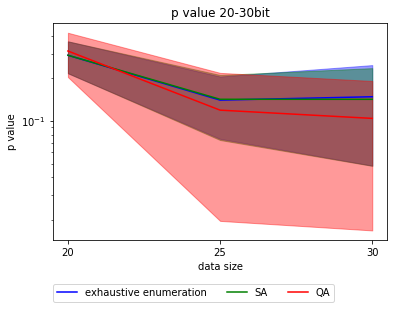

In [36]:
############################################## p30 ###################################################
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_p_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_p_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_p_30['QA'], label='QA', color='r')

ax.fill_between(bit_list_30, mean_p_30['enumeration'] + std_p_30['enumeration'], mean_p_30['enumeration'] - std_p_30['enumeration'], alpha=0.4, color='b')
ax.fill_between(bit_list_30, mean_p_30['SA'] + std_p_30['SA'], mean_p_30['SA'] - std_p_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_p_30['QA'] + std_p_30['QA'], mean_p_30['QA'] - std_p_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
#ax.legend(loc='lower left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('p value')

ax.set_xticks(bit_list_30)
ax.set_yscale('log')
plt.title('p value 20-30bit')
plt.savefig('slide/p_std_log.png')
plt.show()

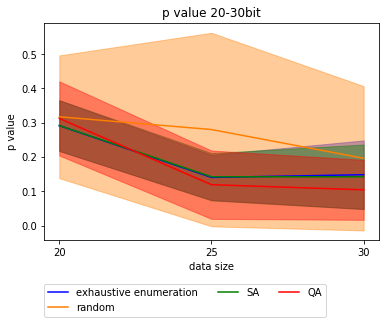

In [37]:
############################################## p30 ###################################################
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_p_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_p_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_p_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_p_30['QA'], label='QA', color='r')

ax.fill_between(bit_list_30, mean_p_30['enumeration'] + std_p_30['enumeration'], mean_p_30['enumeration'] - std_p_30['enumeration'], alpha=0.4, color='b')
ax.fill_between(bit_list_30, mean_p_30['random'] + std_p_30['random'], mean_p_30['random'] - std_p_30['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_30, mean_p_30['SA'] + std_p_30['SA'], mean_p_30['SA'] - std_p_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_p_30['QA'] + std_p_30['QA'], mean_p_30['QA'] - std_p_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
#ax.legend(loc='lower left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('p value')

ax.set_xticks(bit_list_30)
plt.title('p value 20-30bit')
plt.savefig('slide/p_std.png')
plt.show()

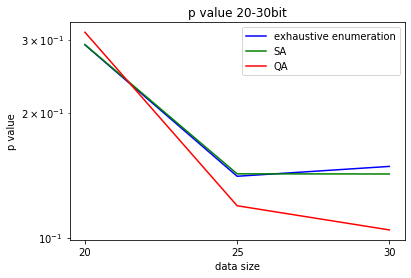

In [45]:
############################################## p30 ###################################################
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_p_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_p_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_p_30['QA'], label='QA', color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
#plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
ax.legend(loc='upper right', ncol=1)
ax.set_xlabel('data size')
ax.set_ylabel('p value')

ax.set_xticks(bit_list_30)
ax.set_yscale('log')
plt.title('p value 20-30bit')
plt.savefig('slide/p_log.png')
plt.show()

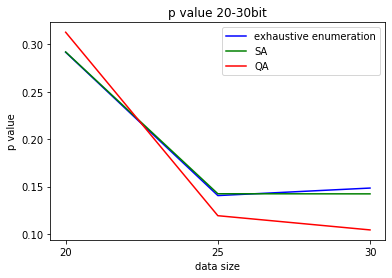

In [46]:
############################################## p30 ###################################################
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_p_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_p_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_p_30['QA'], label='QA', color='r')

ax.legend(loc='upper right', ncol=1)
ax.set_xlabel('data size')
ax.set_ylabel('p value')

ax.set_xticks(bit_list_30)
plt.title('p value 20-30bit')
plt.savefig('slide/p_.png')
plt.show()

### time

In [113]:
mean_time_30 = {}
std_time_30 = {}
for method in method_list_all:
    mean_time_list = []
    std_time_list = []
    for bit in bit_list_30:
        time_list = list(time_dic[method][bit].values())
        mean_time_list.append(statistics.mean(time_list))
        std_time_list.append(statistics.pstdev(time_list))

    mean_time_30[method] = np.array(mean_time_list)
    std_time_30[method] = np.array(std_time_list)

In [114]:
mean_time_30

{'enumeration': array([1.2240000e+00, 5.8391400e+02, 5.4774806e+04]),
 'random': array([0.16080585, 0.08665872, 0.09262717]),
 'SA': array([4.2507319 , 5.84283385, 7.57952614]),
 'QA': array([2.4003082, 2.4003524, 2.4004156])}

In [115]:
std_time_30

{'enumeration': array([1.81961095e+00, 1.15520876e+03, 6.20200715e+04]),
 'random': array([0.05889176, 0.01240844, 0.03638351]),
 'SA': array([0.09981246, 0.1217548 , 0.15658652]),
 'QA': array([2.98087236e-05, 1.24193398e-05, 3.46906327e-05])}

In [118]:
mean_time_40 = {}
std_time_40 = {}
for method in method_list_40:
    mean_time_list = []
    std_time_list = []
    for bit in bit_list_40:
        time_list = list(time_dic[method][bit].values())
        mean_time_list.append(statistics.mean(time_list))
        std_time_list.append(statistics.pstdev(time_list))

    mean_time_40[method] = np.array(mean_time_list)
    std_time_40[method] = np.array(std_time_list)

In [119]:
mean_time_40

{'random': array([0.16080585, 0.08665872, 0.09262717, 0.11114168, 0.09287906]),
 'SA': array([ 4.2507319 ,  5.84283385,  7.57952614,  9.74239192, 11.93023701]),
 'QA': array([2.4003082, 2.4003524, 2.4004156, 2.4004258, 2.4004732])}

In [120]:
std_time_40

{'random': array([0.05889176, 0.01240844, 0.03638351, 0.03011434, 0.        ]),
 'SA': array([0.09981246, 0.1217548 , 0.15658652, 0.12362918, 0.23519078]),
 'QA': array([2.98087236e-05, 1.24193398e-05, 3.46906327e-05, 3.12179436e-05,
        3.56617442e-05])}

### per_time

In [121]:
mean_per_time_30 = {}
std_per_time_30 = {}

for method in method_list_all:
    mean_time_list = []
    std_time_list = []
    for bit in bit_list_30:
        time_list = list(per_time_dic[method][bit].values())
        mean_time_list.append(statistics.mean(time_list))
        std_time_list.append(statistics.pstdev(time_list))

    mean_per_time_30[method] = np.array(mean_time_list)
    std_per_time_30[method] = np.array(std_time_list)

In [122]:
mean_per_time_30

{'enumeration': array([0.00062151, 0.00677015, 0.45260422]),
 'random': array([0.0401529 , 0.01450673, 0.05806796]),
 'SA': array([0.00487004, 0.00147079, 0.00082512]),
 'QA': array([0.02132916, 0.26005924, 0.12836257])}

In [123]:
std_per_time_30

{'enumeration': array([0.00094341, 0.01273235, 0.80535768]),
 'random': array([0.06908087, 0.00885738, 0.0281738 ]),
 'SA': array([5.79092763e-03, 1.41961623e-03, 4.26170862e-05]),
 'QA': array([0.01637564, 0.47013611, 0.1127326 ])}

In [127]:
mean_per_time_40 = {}
std_per_time_40 = {}

for method in method_list_40:
    mean_time_list = []
    std_time_list = []
    for bit in bit_list_40:
        time_list = list(per_time_dic[method][bit].values())
        mean_time_list.append(statistics.mean(time_list))
        std_time_list.append(statistics.pstdev(time_list))

    mean_per_time_40[method] = np.array(mean_time_list)
    std_per_time_40[method] = np.array(std_time_list)

In [128]:
mean_per_time_40

{'random': array([0.0401529 , 0.01450673, 0.05806796, 0.05217533, 0.09287906]),
 'SA': array([0.00487004, 0.00147079, 0.00082512, 0.0010118 , 0.00123562]),
 'QA': array([0.02132916, 0.26005924, 0.12836257, 0.18910536, 0.4939894 ])}

In [129]:
std_per_time_40

{'random': array([0.06908087, 0.00885738, 0.0281738 , 0.02766287, 0.        ]),
 'SA': array([5.79092763e-03, 1.41961623e-03, 4.26170862e-05, 2.24769025e-05,
        1.71427588e-05]),
 'QA': array([0.01637564, 0.47013611, 0.1127326 , 0.12919357, 0.38299783])}

### valid_y_num

In [130]:
mean_valid_y_num_30 = {}
std_valid_y_num_30 = {}

for method in method_list_all:
    mean_num_list = []
    std_num_list = []
    for bit in bit_list_30:
        num_list = list(y_dic['valid_y_num'][method][bit].values())
        mean_num_list.append(statistics.mean(num_list))
        std_num_list.append(statistics.pstdev(num_list))

    mean_valid_y_num_30[method] = np.array(mean_num_list)
    std_valid_y_num_30[method] = np.array(std_num_list)

In [131]:
mean_valid_y_num_30

{'enumeration': array([  4424.8,  27893.6, 302494.2]),
 'random': array([43.        , 10.66666667,  2.75      ]),
 'SA': array([2600. , 6477.6, 9210.8]),
 'QA': array([204.4,  91. ,  82. ])}

In [132]:
std_valid_y_num_30

{'enumeration': array([  6058.52290249,  31593.63668589, 301814.3223854 ]),
 'random': array([58.94064811,  8.80656321,  2.48746859]),
 'SA': array([2486.35741598, 2703.59683385,  515.39088079]),
 'QA': array([138.13413771,  62.17716623, 102.98931983])}

In [133]:
mean_valid_y_num_40 = {}
std_valid_y_num_40 = {}

for method in method_list_40:
    mean_num_list = []
    std_num_list = []
    for bit in bit_list_40:
        num_list = list(y_dic['valid_y_num'][method][bit].values())
        mean_num_list.append(statistics.mean(num_list))
        std_num_list.append(statistics.pstdev(num_list))

    mean_valid_y_num_40[method] = np.array(mean_num_list)
    std_valid_y_num_40[method] = np.array(std_num_list)

In [134]:
mean_valid_y_num_40

{'random': array([43.        , 10.66666667,  2.75      ,  2.75      ,  1.        ]),
 'SA': array([2600. , 6477.6, 9210.8, 9631.6, 9654.6]),
 'QA': array([204.4,  91. ,  82. ,  25.8,   7.8])}

In [135]:
std_valid_y_num_40

{'random': array([58.94064811,  8.80656321,  2.48746859,  1.47901995,  0.        ]),
 'SA': array([2486.35741598, 2703.59683385,  515.39088079,  155.98794825,
          70.22421235]),
 'QA': array([138.13413771,  62.17716623, 102.98931983,  24.04495789,
          4.16653333])}

### p_value

In [136]:
mean_p_30 = {}
std_p_30 = {}

for method in method_list_all:
    mean_p_list = []
    std_p_list = []
    for bit in bit_list_30:
        p_list = list(p_dic[method][bit].values())
        mean_p_list.append(statistics.mean(p_list))
        std_p_list.append(statistics.pstdev(p_list))

    mean_p_30[method] = np.array(mean_p_list)
    std_p_30[method] = np.array(std_p_list)

In [137]:
mean_p_30

{'enumeration': array([0.2915549 , 0.14052669, 0.14844013]),
 'random': array([0.31741186, 0.28019324, 0.19642857]),
 'SA': array([0.29186597, 0.14243525, 0.14232701]),
 'QA': array([0.31263678, 0.11931493, 0.10433381])}

In [138]:
std_p_30

{'enumeration': array([0.07412885, 0.06575744, 0.10007932]),
 'random': array([0.1790438 , 0.28235052, 0.21053261]),
 'SA': array([0.07390318, 0.06907029, 0.09416441]),
 'QA': array([0.10814523, 0.09965507, 0.08750269])}

In [142]:
mean_p_40 = {}
std_p_40 = {}

for method in method_list_40:
    mean_p_list = []
    std_p_list = []
    for bit in bit_list_40:
        #print(bit)
        p_list = list(p_dic[method][bit].values())
        mean_p_list.append(statistics.mean(p_list))
        std_p_list.append(statistics.pstdev(p_list))

    mean_p_40[method] = np.array(mean_p_list)
    std_p_40[method] = np.array(std_p_list)

In [143]:
mean_p_40

{'random': array([0.31741186, 0.28019324, 0.19642857, 0.25      , 0.        ]),
 'SA': array([0.29186597, 0.14243525, 0.14232701, 0.07045267, 0.0450673 ]),
 'QA': array([0.31263678, 0.11931493, 0.10433381, 0.02777778, 0.01538462])}

In [144]:
std_p_40

{'random': array([0.1790438 , 0.28235052, 0.21053261, 0.4330127 , 0.        ]),
 'SA': array([0.07390318, 0.06907029, 0.09416441, 0.04330218, 0.0144676 ]),
 'QA': array([0.10814523, 0.09965507, 0.08750269, 0.03828902, 0.03076923])}

### total_y_num

In [148]:
mean_total_y_num_40 = {}
std_total_y_num_40 = {}

for method in method_list_40:
    mean_total_num_list = []
    std_total_num_list = []
    for bit in bit_list_40:
        total_num_list = list(y_dic['total_y_num'][method][bit].values())
        mean_total_num_list.append(statistics.mean(total_num_list))
        std_total_num_list.append(statistics.pstdev(total_num_list))

    mean_total_y_num_40[method] = np.array(mean_total_num_list)
    std_total_y_num_40[method] = np.array(std_total_num_list)

In [149]:
mean_total_y_num_40

{'random': array([43.        , 10.66666667,  2.75      ,  2.75      ,  1.        ]),
 'SA': array([9728, 9510, 9610, 9646, 9657]),
 'QA': array([237,  93,  82,  25,   7])}

In [150]:
std_total_y_num_40

{'random': array([58.94064811,  8.80656321,  2.48746859,  1.47901995,  0.        ]),
 'SA': array([103.10674081, 492.08637453, 318.58436873, 151.80250327,
         70.74602462]),
 'QA': array([162.2498074 ,  62.36986452, 103.75933693,  24.04163056,
          4.12310563])}

### mean_occurrence

In [154]:
mean_occurrence_40 = {}
std_occurrence_40 = {}

for method in method_list_40:
    mean_occurrence_list = []
    std_occurrence_list = []
    for bit in bit_list_40:
        occurrence_list = list(y_dic['mean_occurrence'][method][bit].values())
        mean_occurrence_list.append(statistics.mean(occurrence_list))
        std_occurrence_list.append(statistics.pstdev(occurrence_list))

    mean_occurrence_40[method] = np.array(mean_occurrence_list)
    std_occurrence_40[method] = np.array(std_occurrence_list)

In [155]:
mean_occurrence_40

{'random': array([1, 1, 1, 1, 1]),
 'SA': array([10,  2,  1,  1,  1]),
 'QA': array([1, 1, 1, 1, 1])}

In [156]:
std_occurrence_40

{'random': array([0., 0., 0., 0., 0.]),
 'SA': array([12.72792206,  2.        ,  0.        ,  0.        ,  0.        ]),
 'QA': array([0., 0., 0., 0., 0.])}